In [1]:
# imports
import pandas as pd # data mangling
import matplotlib
from matplotlib import pyplot as plt
import scipy
import numpy as np
import seaborn as sns

In [2]:
# read all csv files to dataframes

task1_lj = pd.read_csv('task1_lj.csv')
task2_lj = pd.read_csv('task2_lj.csv')
task3_lj = pd.read_csv('task3_lj.csv')
task4_lj = pd.read_csv('task4_lj.csv')
task1_ev = pd.read_csv('task1_ev.csv')
task2_ev = pd.read_csv('task2_ev.csv')
task3_ev = pd.read_csv('task3_ev.csv')
task4_ev = pd.read_csv('task4_ev.csv')

In [3]:
# concat csv files of same tasks

df_task1 = pd.concat([task1_lj, task1_ev], ignore_index=True, sort=False)
df_task2 = pd.concat([task2_lj, task2_ev], ignore_index=True, sort=False)
df_task3 = pd.concat([task3_lj, task3_ev], ignore_index=True, sort=False)
df_task4 = pd.concat([task4_lj, task4_ev], ignore_index=True, sort=False)

In [4]:
# estimated time constants

TASK_1_ESTIMATE = 32.3578
TASK_2_ESTIMATE = 12.6837
TASK_3_ESTIMATE = 8.6786
TASK_4_ESTIMATE = 4.2279

TASK_1_LITERATURE_ESTIMATE = 64.100
TASK_2_LITERATURE_ESTIMATE = 10.200
TASK_3_LITERATURE_ESTIMATE = 17.100
TASK_4_LITERATURE_ESTIMATE = 3.400

TASK_ESTIMATES = {"Task 1" : 32.3578, "Task 2": 12.6837, "Task 3": 8.6786, "Task 4": 4.2279}
TASK_LITERATURE_ESTIMATES = {"Task 1": 64.100, "Task 2": 10.200, "Task 3": 17.100, "Task 4": 3.400}

# Task 1

Visualization example of a single task. I suggest we instead use the combined graph from the next section.

In [5]:
# Visualization of a single task

# first, put all start and end times into an array
start_times = pd.to_datetime(df_task1[(df_task1['key'] == 'EXPERIMENT_START')]['timestamp']).tolist()
end_times = pd.to_datetime(df_task1[(df_task1['key'] == 'EXPERIMENT_END')]['timestamp']).tolist()

task1_time_delta = []

for x in range (len(start_times)):
    task1_time_delta.append(end_times[x] - start_times[x])

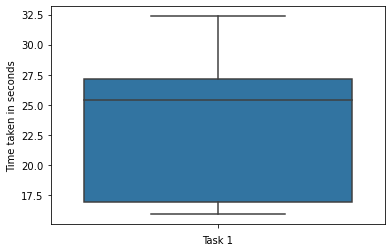

In [6]:
df_task1_delta = pd.DataFrame(columns=["time_taken_in_s", "is_estimate"])

for time in task1_time_delta:
    df_task1_delta = df_task1_delta.append({
        'time_taken_in_s': time.total_seconds(),
        'is_estimate': False
    }, ignore_index=True)
    
df_task1_delta = df_task1_delta.append({
        'time_taken_in_s': 32.3578,
        'is_estimate': True
    }, ignore_index=True)

plot = sns.boxplot(
    data = df_task1_delta,
    y = 'time_taken_in_s'
)
plot.set(xlabel = "Task 1", ylabel = "Time taken in seconds")

plt.show()

# Other tasks

In [7]:
# if we want "single" graphs for every task we can basically just copy & paste the code from Task 1 above
# instead, we could plot a graph containing all 4 tasks for easy side to side comparison
# to do that, we first need to get the time_deltas of all other tasks

start_times_task2 = pd.to_datetime(df_task2[(df_task2['key'] == 'EXPERIMENT_START')]['timestamp']).tolist()
end_times_task2 = pd.to_datetime(df_task2[(df_task2['key'] == 'EXPERIMENT_END')]['timestamp']).tolist()

start_times_task3 = pd.to_datetime(df_task3[(df_task3['key'] == 'EXPERIMENT_START')]['timestamp']).tolist()
end_times_task3 = pd.to_datetime(df_task3[(df_task3['key'] == 'EXPERIMENT_END')]['timestamp']).tolist()

start_times_task4 = pd.to_datetime(df_task4[(df_task4['key'] == 'EXPERIMENT_START')]['timestamp']).tolist()
end_times_task4 = pd.to_datetime(df_task4[(df_task4['key'] == 'EXPERIMENT_END')]['timestamp']).tolist()

task2_time_delta = []
task3_time_delta = []
task4_time_delta = []

# in order for this loop to work properly, all tasks need to have been completed an equal amount of times
# if this throws an index out of bounds exception, check your logs or make separate loops for all tasks
for x in range (len(start_times_task2)):
    task2_time_delta.append(end_times_task2[x] - start_times_task2[x])
    task3_time_delta.append(end_times_task3[x] - start_times_task3[x])
    task4_time_delta.append(end_times_task4[x] - start_times_task4[x])

# Side by side comparison

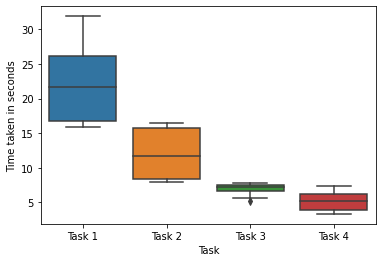

In [8]:
# prepare a DataFrame that holds the task number, and the time taken
df_all_tasks_delta = pd.DataFrame(columns=["task", "time_taken_in_s", "is_estimate"])

# append all values from the time delta dataframes and assign them their respective task
for time in task1_time_delta:
    df_all_tasks_delta = df_all_tasks_delta.append({
        'task': "Task 1",
        'time_taken_in_s': time.total_seconds(),
        'is_estimate': False
    }, ignore_index=True)
    
for time in task2_time_delta:
    df_all_tasks_delta = df_all_tasks_delta.append({
        'task': "Task 2",
        'time_taken_in_s': time.total_seconds(),
        'is_estimate': False
    }, ignore_index=True)
    
for time in task3_time_delta:
    df_all_tasks_delta = df_all_tasks_delta.append({
        'task': "Task 3",
        'time_taken_in_s': time.total_seconds(),
        'is_estimate': False
    }, ignore_index=True)
    
for time in task4_time_delta:
    df_all_tasks_delta = df_all_tasks_delta.append({
        'task': "Task 4",
        'time_taken_in_s': time.total_seconds(),
        'is_estimate': False
    }, ignore_index=True)

plot = sns.boxplot(
    data = df_all_tasks_delta,
    x = 'task',
    y = 'time_taken_in_s'
)
plot.set(xlabel = "Task", ylabel = "Time taken in seconds")

plt.show()

# Comparison with estimated times

In [11]:
# task 1

df_all_tasks_estimates = pd.DataFrame(["task", "time_taken_in_s", "is_literature_estimate"])

# iterate over the dictionaries and append the values to the DataFrame
for key in TASK_ESTIMATES:
    df_all_tasks_estimates = df_all_tasks_estimates.append({
        'task': key,
        'time_taken_in_s': TASK_ESTIMATES[key],
        'is_literature_estimate': False
    }, ignore_index=True)

for key in TASK_LITERATURESTIMATES:
    df_all_tasks_estimates = df_all_tasks_estimates.append({
        'task': key,
        'time_taken_in_s': TASK_ESTIMATES[key],
        'is_literature_estimate': False
    }, ignore_index=True)

In [ ]:
plot = sns.stripplot(
    data = df_all_tasks_estimates,
    y = 'time_taken_in_s',
    x = "task",
    hue = "is_literature_estimate"
)

In [ ]:
plot = sns.stripplot(
    data = df_all_tasks_delta,
    y = 'time_taken_in_s',
    x = "is_estimate",
    hue = "task"
)

In [ ]:
qualitative_colors = sns.color_palette("Set3", 10)
ax = sns.stripplot(
    data = df_all_tasks_estimates,
    y = 'time_taken_in_s',
    x = "task",
    hue = "is_literature_estimate",
    color="red"
)

plot = sns.boxplot(
    data = df_all_tasks_delta,
    x = 'task',
    y = 'time_taken_in_s',
    ax=ax
)

plot.set(ylim=(0, 36))

plt.show()